# **Hands-on 3: Kmeans Notebook**

**Clasificación Inteligente de Datos**

Daniel García Figueroa

## **1.1  Fundamentos de la técnica**

Es un algoritmo de aprendizaje no supervisado utilizado para la agrupación en clústeres de datos, que agrupa puntos de datos no etiquetados en grupos o clústeres. Los datos se agrupan de tal manera que los puntos en el mismo clúster sean más similares entre sí que los puntos en otros clusters.

A diferencia del aprendizaje supervisado, los datos de entrenamiento que utiliza este algoritmo no están etiquetados, lo que significa que los puntos de datos no tienen una estructura de clasificación definida.

Cada grupo se representa por su centroide, que es el promedio de sus puntos. El algoritmo ajusta iterativamente estos centroides hasta que cada punto quede más cerca del de su grupo que de los demás, reduciendo al máximo las distancias internas.

---

**¿Cómo funciona?**

1. Definir el número de clústers (k): Se determina cuántos grupos se quieren formar dentro del conjunto de datos.

2. Elegir centroides iniciales: Se seleccionan aleatoriamente k puntos del conjunto de datos que funcionarán como los centroides iniciales.

3. Asignar los puntos a los clústers: Cada punto se asocia al clúster cuyo centroide esté más cercano, calculando las distancias entre ellos.

4. Actualizar los centroides: Se recalcula la posición de cada centroide tomando el promedio de los puntos que pertenecen a su clúster.

5. Repetir el proceso: Los pasos 3 y 4 se repiten hasta que los centroides se estabilicen o se alcance el número máximo de iteraciones.


---



**Para elegir el valor adecuado de k, se puede usar:**

- Método del codo: Se grafica el número de clústers frente al error (SSE). El punto donde la mejora se vuelve mínima indica el k óptimo.

- Validación cruzada: Se divide el conjunto de datos en partes y se prueba el algoritmo varias veces para encontrar el k que da mejores resultados.


## **1.2  Modelo Matemático**

### **Datasets**
Matemáticamente, se parte de un conjunto de datos:

$$
X = \{x_1, x_2, \dots, x_n\}, \quad x_i \in \mathbb{R}^d
$$

- \( n \) es el número total de instancias,  
- \( d \) representa las dimensiones o características,  
- y \( k \) es la cantidad de clústers que se desean formar.


---


### **Objetivo**

El propósito del algoritmo es **minimizar la distancia total** entre los puntos y el centroide de su clúster. Matemáticamente se expresa como:

$$
J = \sum_{i=1}^{k} \sum_{x_j \in C_i} \|x_j - \mu_i\|^2
$$

donde:
- $C_i$ es el conjunto de puntos asignados al clúster $i$.  
- $\mu_i$ es el centroide (vector) del clúster $i$.  
- $\|x_j - \mu_i\|^2$ representa la **distancia euclidiana al cuadrado** entre el punto $x_j$ y su centroide $\mu_i$.


El algoritmo busca el valor de \( J \) más pequeño posible.


---


### **Actualización de centroides**

Cada centroide se actualiza en cada iteración tomando el promedio de todos los puntos que pertenecen al mismo clúster:

$$
\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
$$


---



### **Condición de Convergencia**

El algoritmo se repite hasta que los centroides ya no cambian significativamente entre iteraciones:

$$
\mu_i^{(t+1)} \approx \mu_i^{(t)}
$$

Cuando esto sucede, se considera que el modelo ha alcanzado una solución estable o que se llegó al número máximo de iteraciones.



## **1.3  Descripción de la librería, clases, funciones en su respectiva sección**

## **1.4. Pipeline**

El propósito de aplicar el algoritmo K-Means en este dataset es realizar una segmentación de clientes basada en sus características principales: edad, ingreso anual y puntaje de gasto (Spending Score).

La idea es identificar grupos o patrones de comportamiento entre los clientes del centro comercial para entender mejor cómo se relacionan sus hábitos de compra con su nivel de ingreso.

### **1.4.1 Preprocesamiento**

Resumen estadístico:
       CustomerID     Age  Annual Income (k$)  Spending Score (1-100)
count      200.00  200.00              200.00                  200.00
mean       100.50   38.85               60.56                   50.20
std         57.88   13.97               26.26                   25.82
min          1.00   18.00               15.00                    1.00
25%         50.75   28.75               41.50                   34.75
50%        100.50   36.00               61.50                   50.00
75%        150.25   49.00               78.00                   73.00
max        200.00   70.00              137.00                   99.00

Tamaño del dataset (filas,columnas):
(200, 5)

Primeras 5 filas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

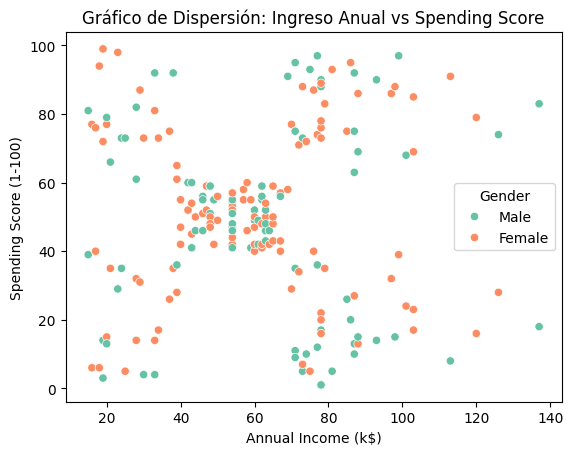

In [42]:
import pandas as pd # Está diseñada específicamente para la manipulación y el análisis de datos en el lenguaje Python. Trabaja sobre dataframes
import matplotlib.pyplot as plt # Librería para crear gráficos
import seaborn as sns # Librería para gráficos estadísticos

df = pd.read_csv('/content/sample_data/Mall_Customers.csv') # Se lee el archivo de csv del dataset que subí manualmente

# Muestra estadísticas descriptivas del dataset
print("Resumen estadístico:")
print(df.describe().round(2))
print()
# Muestra el tamaño del dataset (filas, columnas)
print("Tamaño del dataset (filas,columnas):")
print(df.shape)
print()
# Muestra las primeras 5 filas
print("Primeras 5 filas:")
print(df.head())
print()


# Graficas de dispersión de ingreso anual vs el puntaje de gasto
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set2')
plt.title('Gráfico de Dispersión: Ingreso Anual vs Spending Score')
plt.show()

# Seleccionar solo columnas numéricas
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


### **1.4.2 Prediction**



In [44]:
# KMeans: clase que implementa el algoritmo de clustering K-means en Scikit-learn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) # Creo el modelpo KMeans con k=7 vecinos y una semilla fija
kmeans.fit(X) # Entrenamos el modelo con conjunto
y_kmeans = kmeans.labels_ # Obtenemos las etiquetas de cluster asignadas a cada punto en X

# Función para predecir el clúster de una nueva entrada
def probar_patron(kmeans_model, X): # Recibe el modelo kmeans entrenado anteriormente y un conjunto de datos
  cluster_pred = kmeans_model.predict(X) # Guarda la predicción de cluster
  return cluster_pred # Retorna la predicción

In [46]:
# Recorrer solo 30 instancias del conjunto de datos numéricos
for i in range(30):
    x = pd.DataFrame([X.iloc[i]], columns=X.columns) # Convierto a un df para conservar las columnas
    y_pred = probar_patron(kmeans, x) # Usamos la función declarada arriba, pasándole el modelo y la instancia del recorrido
    print(f"Patrón {i+1}: Entrada = {X.iloc[i].values.round(2)}, Clúster asignado = {y_pred[0]}")

Patrón 1: Entrada = [19 15 39], Clúster asignado = 2
Patrón 2: Entrada = [21 15 81], Clúster asignado = 2
Patrón 3: Entrada = [20 16  6], Clúster asignado = 0
Patrón 4: Entrada = [23 16 77], Clúster asignado = 2
Patrón 5: Entrada = [31 17 40], Clúster asignado = 0
Patrón 6: Entrada = [22 17 76], Clúster asignado = 2
Patrón 7: Entrada = [35 18  6], Clúster asignado = 0
Patrón 8: Entrada = [23 18 94], Clúster asignado = 2
Patrón 9: Entrada = [64 19  3], Clúster asignado = 0
Patrón 10: Entrada = [30 19 72], Clúster asignado = 2
Patrón 11: Entrada = [67 19 14], Clúster asignado = 0
Patrón 12: Entrada = [35 19 99], Clúster asignado = 2
Patrón 13: Entrada = [58 20 15], Clúster asignado = 0
Patrón 14: Entrada = [24 20 77], Clúster asignado = 2
Patrón 15: Entrada = [37 20 13], Clúster asignado = 0
Patrón 16: Entrada = [22 20 79], Clúster asignado = 2
Patrón 17: Entrada = [35 21 35], Clúster asignado = 0
Patrón 18: Entrada = [20 21 66], Clúster asignado = 2
Patrón 19: Entrada = [52 23 29], Clús

### **1.4.3 Model Evaluation:**

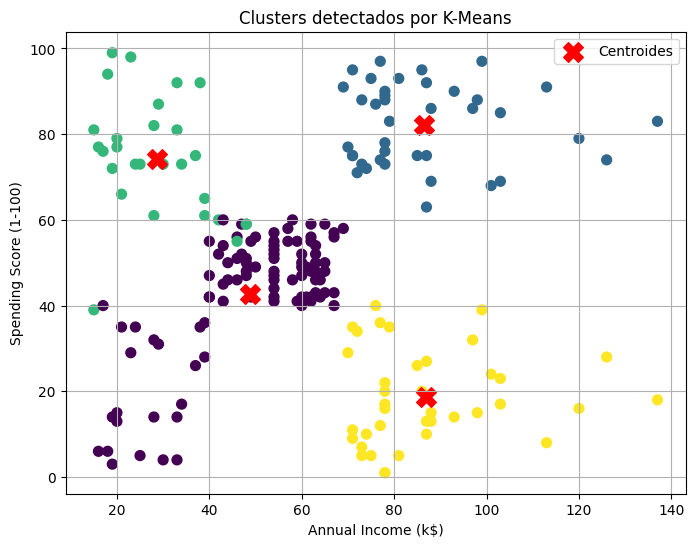

In [47]:
# Obtenemos los centroides
centroids = kmeans.cluster_centers_

# Gráfico de los clústeres y centroides
plt.figure(figsize=(8, 6))

# Graficar puntos (usando ingreso anual y spending score)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans, s=50, cmap='viridis')

# Graficar centroides
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroides')

plt.title("Clusters detectados por K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()




### **Elección de k**

Decidí usar k=4 para mi modelo de K-means porque al ver la gráfica del método del codo, ese es el punto donde la curva ya no cae tanto. Ya que antes del 4 la inercia baja mucho, pero después del 4 ya no baja tanto, se empieza a aplanar la línea. Además de que se observan mejor concentrados con este número que con 5 u otro.

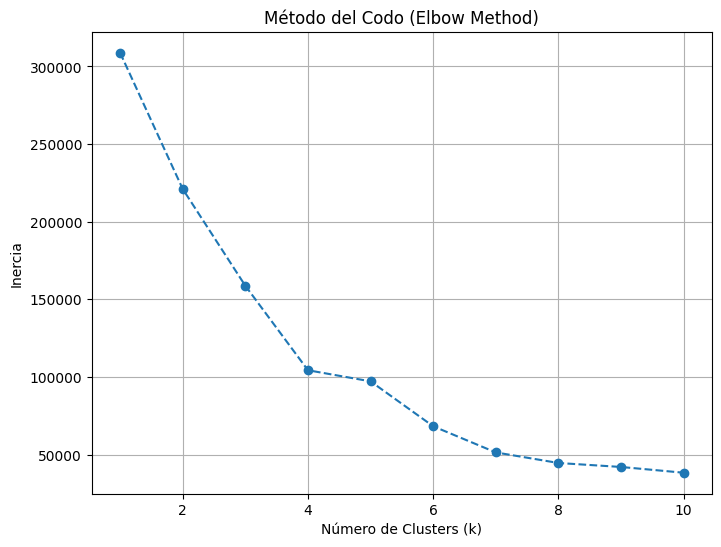

In [32]:
inertia = []  # Lista para guardar la inercia de cada modelo
K_range = range(1, 11)  # Probar k de 1 a 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42) # Crear un modelo KMeans con k vecinos
    kmeans.fit(X) # Entrena el modelo
    inertia.append(kmeans.inertia_) # Guarda la suma de distancias al cuadrado de cada punto a su centroide para el valor actual de k


# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

## **Conclusión**

La graficación de los clúster me ayudó a ver que K-Means logró separar bastante bien los datos en 4 grupos distintos. Parece que cada cluster tiene un patrón, por ejemplo, el verde junta clientes con ingresos bajos pero que gastan mucho, mientras que el azul marino tiene clientes con ingresos y gasto alto.

Los centroides se ven bien en el centro de cada grupo, lo que me hace pensar que el algoritmo funcionó como debía. Sí hay algunas zonas donde los clusters se mezclan un poco, pero en general la separación se entiende y tiene sentido.

## **Referencias Bibliográficas**

Kavlakoglu, E., & Winland, V. (2025, febrero 13). ¿Qué es la agrupación en clústeres k-means? Ibm.com. https://www.ibm.com/mx-es/think/topics/k-means-clustering

Ramírez, L. (2024, October 30). Algoritmo k-means: ¿Qué es y cómo funciona? Thinking for Innovation. https://www.iebschool.com/hub/algoritmo-k-means-que-es-y-como-funciona-big-data/

GeeksforGeeks. (2025, August 22). K means Clustering – Introduction. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-means-clustering-introduction/

